# Problema 1: Clasificación

A lo largo del curso hemos visto diferentes técnicas para entrenar algoritmos. En este problema buscamos implenentar las técnicas que conocemos para resolver el problema de clasificación en la base de datos de fraudes de tarjetas de crédito.

Comenzamos por importar los datos y las librerías relevantes.

In [97]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

path="Credit Card Fraud/creditcard.csv"
datos_df=pd.read_csv(path) 
datos_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


1. Mediante filtros en la variable `Class` del DataFrame `datos_df`, obtén el número de: transacciones fraudulentas, transacciones no-fraudulentas, total de transacciones (cada entrada es una transacción). ¿Cuál es la proporción entre los miembros de las clases? ¿Las clases están balanceadas?

In [98]:
print("No. de Transacciones Fraudulentas",datos_df[datos_df['Class']==1].shape[0])
print("No. de Transacciones No-Fraudulentas",datos_df[datos_df['Class']==0].shape[0])
print("No. Total de Transacciones",datos_df.shape[0])

No. de Transacciones Fraudulentas 492
No. de Transacciones No-Fraudulentas 284315
No. Total de Transacciones 284807


**Advertencia.** Es recomendable no utilizar una SVM de esta librería con más de 100,000 datos. Utilizando la base completa de datos con validación cruzada de 5 cortes en una máquina de 8 Gb de RAM **el algoritmo tardó más de 12 horas en terminar**.

Dado que el número total de datos es de casi 300,000, trabajaremos con un número considerablemente menor de datos: 10,000 (puedes modificar éste número según la capacidad de tu computadora, pero la idea es que los algoritmos no tarden más de 1 minuto en entrenar). Este número será fijo por el resto del problema.

Hay varias formas de construir la submuestra. Compararemos 3 métodos diferentes.

2. La siguiente celda toma los datos `X_data` y las etiquetas correspondientes `y_labels` para entrenar una SVM y obtener la matriz de confusión. 

In [99]:
svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=500)
svc.fit(X_data,y_labels)
predicted_svm=svc.predict(X_data)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
conf_mat_svm

array([[5307,   14],
       [ 110, 4569]])

La siguiente función toma como entrada la matriz de confusión y genera una tabla de distintas métricas de clasificación binaria:

In [100]:
def evaluate_conf_mat(matrix):
    true_pos=matrix[0,0]
    true_neg=matrix[1,1]
    false_positive=matrix[0,1]
    false_negative=matrix[1,0]
    
    total_pos=true_pos+false_negative
    total_neg=true_neg+false_positive
    
    sensitivity=true_pos/total_pos
    specificity=true_neg/total_neg
    pos_predictive_value=true_pos/(true_pos+false_positive)
    neg_predictive_value=true_neg/(true_neg+false_negative)
    
    false_neg_rate=1-sensitivity
    false_pos_rate=1-specificity
    
    false_discovery_rate=1-pos_predictive_value
    false_omission_rate=1-neg_predictive_value
    
    detection_rate=true_pos/(total_pos+total_neg)
    omission_rate=true_neg/(total_pos+total_neg)
    
    accuracy=(true_pos+true_neg)/(total_pos+total_neg) 
    prevalence=(true_pos+false_negative)/(total_pos+total_neg)
    
    f1=2*(sensitivity*pos_predictive_value)/(sensitivity+pos_predictive_value)
    
    informedness= sensitivity + specificity - 1
    markedness= pos_predictive_value + neg_predictive_value - 1
    
    a=(true_pos+false_positive)*(true_pos+false_negative)
    b=(true_neg+false_positive)*(true_neg+false_negative)
    mathews_cc=(true_pos*true_neg-false_positive*false_negative)/(np.sqrt(a)*np.sqrt(b))
    
    resumen1=[total_pos,total_neg,sensitivity,specificity,pos_predictive_value,neg_predictive_value]
    resumen2=[false_neg_rate,false_pos_rate,false_discovery_rate,false_omission_rate,detection_rate,omission_rate]
    resumen3=[accuracy,prevalence,f1,informedness,markedness,mathews_cc]
    resumen=resumen1+resumen2+resumen3
    
    indices1=["Total Positive","Total Negative","Sensitivity","Specificity","Positive Predictive Value","Neg Predictive Value"]
    indices2=["False Negative Rate","False Positive Rate","False Discovery Rate","False Omission Rate","Detection Rate","Omission Rate"]
    indices3=["Accuracy","Prevalence","f1","Informedness","Markedness","Mathews Correlation Coefficient"]
    indices=indices1+indices2+indices3
    
    stats=pd.DataFrame(resumen)
    stats.columns=['cantidad']
    stats.index=indices
    stats.index.name='indicador'
    return stats

2. a) Selecciona los primeros n=10,000 de la base de datos, separa las variables (features) de las etiquetas (labels) de la misma forma que se hizo en clase, nombra las variables `X_data` y `y_labels`. Entrena una SVM con los mismos parámetros de arriba, obtén la matriz de confusión y calcula las métricas usando la función `evaluate_conf_mat` que acabamos de definir.

In [101]:
#separaremos las etiquetas de los datos
sample_df=datos_df.iloc[:10000,:]
X_data=sample_df.iloc[:,1:-1].values
y_labels=sample_df.iloc[:,-1].values #convierte los datos a arreglos de numpy

In [102]:
svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=500)
svc.fit(X_data,y_labels)
predicted_svm=svc.predict(X_data)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[  38    0]
 [   0 9962]]


,cantidad
indicador,
Total Positive,38.0000
Total Negative,9962.0000
Sensitivity,1.0000
Specificity,1.0000
Positive Predictive Value,1.0000
Neg Predictive Value,1.0000
False Negative Rate,0.0000
False Positive Rate,0.0000
False Discovery Rate,0.0000


2. b) Repite el inciso a) con los mismos parámetros para la SVM, pero seleccionando una muestra aleatoria de n=10,000 datos de la base total. Hint: utiliza la función `sample` de pandas. [[link]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) Selecciona una semilla o estado aleatorio para poder reproducir los resultados.

In [103]:
#separaremos las etiquetas de los datos
sample_df=datos_df.sample(n=10000,random_state=42)
X_data=sample_df.iloc[:,1:-1].values
y_labels=sample_df.iloc[:,-1].values #convierte los datos a arreglos de numpy

In [104]:
svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=500)
svc.fit(X_data,y_labels)
predicted_svm=svc.predict(X_data)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[  16    0]
 [   0 9984]]


,cantidad
indicador,
Total Positive,16.0000
Total Negative,9984.0000
Sensitivity,1.0000
Specificity,1.0000
Positive Predictive Value,1.0000
Neg Predictive Value,1.0000
False Negative Rate,0.0000
False Positive Rate,0.0000
False Discovery Rate,0.0000


2. c) Repite el inciso a) con los mismos parámetros para la SVM. Ahora deseamos tener una muestra balanceada de n=10,000 datos. Para esto selecciona los datos anómalos y copialos hasta tener aproximadamente 5,000 datos. Luego selecciona el número restante de datos no-anómalos para tener n datos en total. Hint: utiliza la función `concat` de pandas con una lista de dataframes. [[link]](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [105]:
n_fraud=datos_df[datos_df['Class']==1].shape[0]
n_copies=int(5000/n_fraud)+1
lista_fraud_dfs=[]

for i in range(0,n_copies):
    lista_fraud_dfs.append(datos_df[datos_df['Class']==1])
print(len(lista_fraud_dfs))

sample_df=pd.concat(lista_fraud_dfs)

n_normal=10000-len(sample_df)
sample_df=pd.concat([sample_df,datos_df.sample(n=n_normal,random_state=42)])
sample_df.shape

11


(10000, 31)

In [106]:
X_data=sample_df.iloc[:,1:-1].values
y_labels=sample_df.iloc[:,-1].values #convierte los datos a arreglos de numpy

In [107]:
svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=500)
svc.fit(X_data,y_labels)
predicted_svm=svc.predict(X_data)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[5362    6]
 [  55 4577]]


,cantidad
indicador,
Total Positive,5417.000000
Total Negative,4583.000000
Sensitivity,0.989847
Specificity,0.998691
Positive Predictive Value,0.998882
Neg Predictive Value,0.988126
False Negative Rate,0.010153
False Positive Rate,0.001309
False Discovery Rate,0.001118


2. d) Compara las métricas obtenidas con los 3 métodos de los incisos a), b) y c) ¿Cuál crees que es mejor? ¿Por qué? Selecciona los datos de ese inciso para utilizarlos a continuación.

In [108]:
best_df=sample_df

3. Ahora separaremos los datos hallados en el inciso anterior en prueba y entrenamiento para evaluar el algorimo con datos que no había visto previamente, i.e. que tan bien se generaliza el modelo a datos nuevos. Utiliza los mismos parámetros para la SVM que en el inciso anterior.

    a) Divide los datos en entrenamiento y prueba (70% y 30%), entrena el algoritmo con los datos de entrenamiento y obtén las métricas con los datos de prueba. ¿Cómo se comparan las métricas con las obtenidas en el mejor caso del inciso anterior? Hint: Utiliza la función `train_test_split`. [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [109]:
from sklearn.model_selection import train_test_split

X_data=best_df.iloc[:,1:-1].values
y_labels=best_df.iloc[:,-1].values #convierte los datos a arreglos de numpy
X_train, X_test, y_train, y_test = train_test_split(X_data,y_labels,test_size=0.3,shuffle=True)

In [110]:
svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=500)
svc.fit(X_train,y_train)
predicted_svm=svc.predict(X_test)
conf_mat_svm=confusion_matrix(y_test,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[1599   10]
 [  18 1373]]


,cantidad
indicador,
Total Positive,1617.000000
Total Negative,1383.000000
Sensitivity,0.988868
Specificity,0.992769
Positive Predictive Value,0.993785
Neg Predictive Value,0.987060
False Negative Rate,0.011132
False Positive Rate,0.007231
False Discovery Rate,0.006215


3. b) Ahora haremos la partición de prueba y entrenamiento mediante validación cruzada con 5 cortes (5-fold cross-validation). Utiliza la función `cross_val_predict` para entrenar el modelo y obtener las métricas de evaluación. [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) 

In [111]:
from sklearn.model_selection import cross_val_predict

svc=SVC(C=1,kernel='rbf',gamma="auto", coef0=0.0,class_weight='balanced',cache_size=400)
predicted_svm=cross_val_predict(svc, X_data,y_labels, cv=5)
conf_mat_svm=confusion_matrix(y_labels,predicted_svm,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print("\n",conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)


 [[5361   24]
 [  56 4559]]


,cantidad
indicador,
Total Positive,5417.000000
Total Negative,4583.000000
Sensitivity,0.989662
Specificity,0.994763
Positive Predictive Value,0.995543
Neg Predictive Value,0.987866
False Negative Rate,0.010338
False Positive Rate,0.005237
False Discovery Rate,0.004457


3. c) ¿Cómo se comparan las métricas obtenidas en los incisos a) y b)? ¿Qué modelo de los dos utilizarías para clasificar transacciones en la vida real? ¿Por qué? 

4. Ahora optimizaremos los híperparámetros del algoritmo con el conjunto de validación, mediante validación cruzada en una malla de parámetros predeterminada.
    
    a) Divide los datos hallados en el inciso 2 en entrenamiento, validación y prueba (70%,15%, 15%). Hint: Utiliza la función `train_test_split` para dividir los datos entre prueba y el resto (X_rest, y_rest) y utilizala una segunda vez para dividirlos en validación y entrenamiento.

In [129]:
from sklearn.model_selection import train_test_split

X_data=best_df.iloc[:,1:-1].values
y_labels=best_df.iloc[:,-1].values #convierte los datos a arreglos de numpy
X_rest, X_test, y_rest, y_test = train_test_split(X_data,y_labels,test_size=0.15,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_rest,y_rest,test_size=0.15/0.85,shuffle=True)

In [130]:
X_train.shape,X_test.shape,X_val.shape

((7000, 29), (1500, 29), (1500, 29))

In [131]:
y_train.shape,y_test.shape,y_val.shape

((7000,), (1500,), (1500,))

In [132]:
y_train.shape[0]/10000,y_test.shape[0]/10000,y_val.shape[0]/10000

(0.7, 0.15, 0.15)

4.    b) Utiliza ciclos `for` anidados para entrenar una SVM con todas las combinaciones posibles de valores de los híperparámetros que estan en el diccionario que aparece en la siguiente celda. Utiliza los datos de entrenamiento para entrenar y los datos de validación para calcular la métrica del Coeficiente de Correlación de Mathews. Escoge la combinación de híperparámetros que resulte en el mejor Coeficiente de Correlación de Mathews. Finalmente, con la combinación de parámetros elejida, utiliza los datos de prueba para calcular todas las métricas de evaluación con la función `eval_conf_mat`. 

Hint: Incluye el parámetro `max_iter=5000` dentro de la función `SVC`, para limitar el tiempo que tarda en converger cada interación.

In [94]:
svm_grid={"C":[0.001,0.01,0.1,1,10,100,1000,10000],'class_weight':['balanced',None],
          'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [140]:
results=[]
algorithms=[]

for c in svm_grid["C"]:
    for weight in svm_grid["class_weight"]:
        for kernel in svm_grid['kernel']:
            #print(c, weight,kernel)
            svc=SVC(C=c,kernel=kernel,class_weight=weight,cache_size=500,gamma='auto',max_iter=5000)
            svc.fit(X_train,y_train) #entrenamiento
            algorithms.append(svc)
            
            predicted_val=svc.predict(X_val) #prediccion con datos de validación
            conf_mat_svm=confusion_matrix(y_val,predicted_val,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
            mcc=evaluate_conf_mat(conf_mat_svm).loc['Mathews Correlation Coefficient'].values[0]
            print(c,weight,kernel,mcc)
            results.append([c,weight,kernel,mcc])

/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.001 balanced linear 0.837804221737458


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.001 balanced poly 0.02227943200217824


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


0.001 balanced rbf nan


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.001 balanced sigmoid 0.31574515609584963


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.001 None linear 0.8292003353735918


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.001 None poly -0.0015949613769508134


/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


0.001 None rbf nan
0.001 None sigmoid 0.4819383533484894


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.01 balanced linear 0.8020914192659446


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.01 balanced poly -0.01764468649611669


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.01 balanced rbf 0.5499626002019276
0.01 balanced sigmoid 0.13106558827016035


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.01 None linear 0.8177155796278768


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.01 None poly 0.13013703273643387
0.01 None rbf 0.4809807556528692
0.01 None sigmoid 0.10370510224276558


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.1 balanced linear 0.6908263491961157


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.1 balanced poly 0.18327496076333435
0.1 balanced rbf 0.8130882555489155
0.1 balanced sigmoid 0.1097855073508108


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.1 None linear 0.547411475310619


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.1 None poly 0.30825667692277803
0.1 None rbf 0.8069590641219856
0.1 None sigmoid 0.07128317169895076


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1 balanced linear 0.8463406903618276


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1 balanced poly 0.05401607939588484
1 balanced rbf 0.9731635682086973
1 balanced sigmoid 0.10954311913083663


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1 None linear 0.8593557195695166


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1 None poly 0.06039305726204564
1 None rbf 0.9798375713683376
1 None sigmoid 0.06836854010449693


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10 balanced linear 0.598335658236387


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10 balanced poly 0.2515107701153615
10 balanced rbf 0.9825516564564466
10 balanced sigmoid 0.10662377307272522


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10 None linear 0.21658587634642984


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10 None poly 0.14804760926035143
10 None rbf 0.9825516564564466
10 None sigmoid 0.06836854010449693


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


100 balanced linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


100 balanced poly 0.043102685964216826
100 balanced rbf 0.9866291274577874
100 balanced sigmoid 0.10662377307272522


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


100 None linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


100 None poly 0.043102685964216826
100 None rbf 0.9866291274577874
100 None sigmoid 0.06836854010449693


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1000 balanced linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1000 balanced poly 0.043102685964216826
1000 balanced rbf 0.9866291274577874
1000 balanced sigmoid 0.10662377307272522


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1000 None linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1000 None poly 0.043102685964216826
1000 None rbf 0.9866291274577874
1000 None sigmoid 0.06836854010449693


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10000 balanced linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10000 balanced poly 0.043102685964216826
10000 balanced rbf 0.9866291274577874
10000 balanced sigmoid 0.10662377307272522


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10000 None linear 0.5917393262403216


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


10000 None poly 0.043102685964216826
10000 None rbf 0.9866291274577874
10000 None sigmoid 0.06836854010449693


In [141]:
results_df=pd.DataFrame(results)
results_df.columns=["C","class_weight","kernel","Mathews CC"]
results_df=results_df.sort_values(by="Mathews CC",ascending=False) #debemos elegir el algoritmo con el mejor resultado
results_df.head(15)

,C,class_weight,kernel,Mathews CC
54,1000.000,None,rbf,0.986629
42,100.000,balanced,rbf,0.986629
62,10000.000,None,rbf,0.986629
46,100.000,None,rbf,0.986629
58,10000.000,balanced,rbf,0.986629
50,1000.000,balanced,rbf,0.986629
38,10.000,None,rbf,0.982552
34,10.000,balanced,rbf,0.982552
30,1.000,None,rbf,0.979838
26,1.000,balanced,rbf,0.973164


In [142]:
best_alg_index=results_df.index[0]
best_alg=algorithms[best_alg_index]
best_alg.get_params()

{'C': 1000,
 'cache_size': 500,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': 5000,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [145]:
predicted_test=best_alg.predict(X_test) #prediccion con datos de prueba
conf_mat_svm=confusion_matrix(y_test,predicted_test,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[813   6]
 [  0 681]]


,cantidad
indicador,
Total Positive,813.000000
Total Negative,687.000000
Sensitivity,1.000000
Specificity,0.991266
Positive Predictive Value,0.992674
Neg Predictive Value,1.000000
False Negative Rate,0.000000
False Positive Rate,0.008734
False Discovery Rate,0.007326


4. c) En el inciso anterior no utilizamos validación cruzada en la parte de entrenamiento. Repite el inciso a) pero utiliza la función `cross_val_predict` con X_rest y y_rest para dividir los datos usados en entrenamiento y validación. Escoge la combinación de híperparámetros que resulte en el mejor Coeficiente de Correlación de Mathews. Finalmente, con la combinación de parámetros elejida, utiliza los datos de prueba para calcular todas las métricas de evaluación con la función `eval_conf_mat`.

    Nota: Una vez seleccionado el modelo con los mejores parámetros, este se debe volver a entrenar con con X_rest y y_rest ya que `cross_val_predict` no regresa modelos entrenados.

In [146]:
from sklearn.model_selection import train_test_split

X_data=best_df.iloc[:,1:-1].values
y_labels=best_df.iloc[:,-1].values #convierte los datos a arreglos de numpy
X_rest, X_test, y_rest, y_test = train_test_split(X_data,y_labels,test_size=0.15,shuffle=True)

X_rest.shape,X_test.shape

((8500, 29), (1500, 29))

In [147]:
results=[]
algorithms=[]

for c in svm_grid["C"]:
    for weight in svm_grid["class_weight"]:
        for kernel in svm_grid['kernel']:
            #print(c, weight,kernel)
            svc=SVC(C=c,kernel=kernel,class_weight=weight,cache_size=500,gamma='auto',max_iter=5000)
            predicted_cv=cross_val_predict(svc, X_rest,y_rest, cv=5) #entrenamiento y predicción sobre dato en validacion
            algorithms.append(svc)
    
            conf_mat_svm=confusion_matrix(y_rest,predicted_cv,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
            mcc=evaluate_conf_mat(conf_mat_svm).loc['Mathews Correlation Coefficient'].values[0]
            print(c,weight,kernel,mcc)
            results.append([c,weight,kernel,mcc])

/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 balanced linear 0.7833504154644726


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 balanced poly 0.10408842154175174


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 balanced rbf nan


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 balanced sigmoid 0.3167909500793967


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 None linear 0.8474088148805397


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.001 None poly 0.0842222329116071


/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


0.001 None rbf nan
0.001 None sigmoid 0.48077942170327204


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.01 balanced linear 0.8287150752644011


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.01 balanced poly 0.21077991204556293


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.01 balanced rbf 0.5600999119767451
0.01 balanced sigmoid 0.09705519425061658


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.01 None linear 0.7218340263817781


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.01 None poly 0.04744546588177117
0.01 None rbf 0.4817105578371748
0.01 None sigmoid 0.06491449958154907


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.1 balanced linear 0.46963007806781


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.1 balanced poly 0.05931565201062845
0.1 balanced rbf 0.8227142027006036
0.1 balanced sigmoid 0.0690814794533964


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.1 None linear 0.6886914282848543


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

0.1 None poly 0.13444135888683925
0.1 None rbf 0.8123846287264576
0.1 None sigmoid 0.037483632262914186


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1 balanced linear 0.5221635952644732


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1 balanced poly 0.12053019406215215
1 balanced rbf 0.9780349393296234
1 balanced sigmoid 0.06566069726603979


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1 None linear 0.5509399983565311


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1 None poly 0.15019075139722188
1 None rbf 0.9794304848063948
1 None sigmoid 0.03275367620390298


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10 balanced linear 0.6294372384365378


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10 balanced poly 0.043765603689242254
10 balanced rbf 0.9907875281785401
10 balanced sigmoid 0.06713790945703635


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10 None linear 0.3316083398725659


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10 None poly 0.08325468909332279
10 None rbf 0.9907950498981293
10 None sigmoid 0.033009613244455234


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

100 balanced linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

100 balanced poly 0.16434489968827545
100 balanced rbf 0.9910302012244693
100 balanced sigmoid 0.06713790945703635


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

100 None linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

100 None poly 0.1224511879912235
100 None rbf 0.9907950498981293
100 None sigmoid 0.033009613244455234


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1000 balanced linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1000 balanced poly 0.20244141392738169
1000 balanced rbf 0.9912653980896773
1000 balanced sigmoid 0.06713790945703635


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1000 None linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

1000 None poly 0.20244141392738169
1000 None rbf 0.9912653980896773
1000 None sigmoid 0.033009613244455234


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10000 balanced linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10000 balanced poly 0.20244141392738169
10000 balanced rbf 0.9912653980896773
10000 balanced sigmoid 0.06713790945703635


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10000 None linear 0.2504757965908613


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

10000 None poly 0.20244141392738169
10000 None rbf 0.9912653980896773
10000 None sigmoid 0.033009613244455234


In [148]:
results_df=pd.DataFrame(results)
results_df.columns=["C","class_weight","kernel","Mathews CC"]
results_df=results_df.sort_values(by="Mathews CC",ascending=False) #debemos elegir el algoritmo con el mejor resultado
results_df.head(15)

,C,class_weight,kernel,Mathews CC
58,10000.000,balanced,rbf,0.991265
54,1000.000,None,rbf,0.991265
62,10000.000,None,rbf,0.991265
50,1000.000,balanced,rbf,0.991265
42,100.000,balanced,rbf,0.991030
46,100.000,None,rbf,0.990795
38,10.000,None,rbf,0.990795
34,10.000,balanced,rbf,0.990788
30,1.000,None,rbf,0.979430
26,1.000,balanced,rbf,0.978035


In [153]:
best_alg_index=results_df.index[0]
best_alg=algorithms[best_alg_index]
best_params=best_alg.get_params()
best_params

{'C': 10000,
 'cache_size': 500,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': 5000,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [161]:
svc=SVC().set_params(**best_params)
svc.fit(X_rest,y_rest)
predicted_test=svc.predict(X_test)
conf_mat_svm=confusion_matrix(y_test,predicted_test,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
print(conf_mat_svm)
evaluate_conf_mat(conf_mat_svm)

[[814   2]
 [  0 684]]


,cantidad
indicador,
Total Positive,814.000000
Total Negative,686.000000
Sensitivity,1.000000
Specificity,0.997085
Positive Predictive Value,0.997549
Neg Predictive Value,1.000000
False Negative Rate,0.000000
False Positive Rate,0.002915
False Discovery Rate,0.002451


4 d) Compara las metricas obtenidas con el conjunto de prueba en los incisos a) y b). ¿Cuál tiene mejores métricas?¿Qué modelo de los dos utilizarías para clasificar transacciones en la vida real? ¿Por qué? 

5. La siguientes celdas utilizan la función `GridSearchCV` para combinar validación cruzada y búsqueda de parámetros en una sola celda.[[link]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) Dada la malla de parámetros (un diccionario) se elije una de todas las combinaciones posibles y se hace validación cruzada con cada combinación. Utilizamos la función de sklearn que calcula el Coeficiente de Correlación de Matthews para evaluar cada predicción. Luego seleccionamos el algoritmo con el mejor resultado en la métrica según la combinación de parámetros y lo evaluamos utilizando el conjunto de prueba.

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef,make_scorer
import numpy as np

mcc=make_scorer(matthews_corrcoef,greater_is_better=True) #convierte la función a un objeto de scoring para optimizar
svm_grid={"C":[0.001,0.01,0.1,1,10,100,1000,10000],'class_weight':['balanced',None],
          'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# le damos parámetros fijos a SVC,ie no varian como los otros hiperparámetros en el diccionario
svm_cv=GridSearchCV(SVC(cache_size=500,gamma='auto',max_iter=5000), svm_grid, scoring=mcc, n_jobs=3, iid=False, refit=True, cv=5,
             verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
svm_cv.fit(X_rest,y_rest)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   35.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 320 out of 320 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
       estimator=SVC(C=1.0, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'class_weight': ['balanced', None], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(matthews_corrcoef), verbose=2)

In [173]:
print(svm_cv.best_score_)
print(svm_cv.best_params_)
print(svm_cv.best_index_)

predicted_test=svm_cv.best_estimator_.predict(X_test)
conf_mat_svm=confusion_matrix(y_test,predicted_test,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
evaluate_conf_mat(conf_mat_svm)

0.9912717649529281
{'C': 1000, 'class_weight': 'balanced', 'kernel': 'rbf'}
50


,cantidad
indicador,
Total Positive,814.000000
Total Negative,686.000000
Sensitivity,1.000000
Specificity,0.997085
Positive Predictive Value,0.997549
Neg Predictive Value,1.000000
False Negative Rate,0.000000
False Positive Rate,0.002915
False Discovery Rate,0.002451


6. Repite el proceso que se realiza en estas dos celdas con los otros algoritmos de clasificación que hemos visto: Decision Tree y Random Forest. Aquí se importan las funciones y se definen los diccionarios a utilizar. Una vez obtenidas las métricas con el conjunto de prueba compara los 3 algoritmos de clasificación.¿Cuál es el que da mejores resultados? 

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree_grid={'criterion':['gini','entropy'],'max_depth':[2,5,7,10,15,20],
           'min_samples_split':[2,4,7,10,15],'class_weight':['balanced',None]}
forest_grid={'n_estimators':[2,5,10,40,75,150],'criterion':['gini','entropy'],
             'max_depth':[2,5,7,10,15,20],'min_samples_split':[2,4,7,10,15],'class_weight':['balanced',None]}

In [177]:
dtree_cv=GridSearchCV(DecisionTreeClassifier(), 
                      dtree_grid, scoring=mcc, n_jobs=3, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
dtree_cv.fit(X_rest,y_rest)
print(dtree_cv.best_score_)
print(dtree_cv.best_params_)
print(dtree_cv.best_index_)

predicted_test=dtree_cv.best_estimator_.predict(X_test)
conf_mat_dtree=confusion_matrix(y_test,predicted_test,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
evaluate_conf_mat(conf_mat_dtree)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  86 tasks      | elapsed:    3.0s


0.9816714235735489
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
115


[Parallel(n_jobs=3)]: Done 600 out of 600 | elapsed:   21.9s finished


,cantidad
indicador,
Total Positive,814.000000
Total Negative,686.000000
Sensitivity,1.000000
Specificity,0.973761
Positive Predictive Value,0.978365
Neg Predictive Value,1.000000
False Negative Rate,0.000000
False Positive Rate,0.026239
False Discovery Rate,0.021635


In [182]:
forest_cv=GridSearchCV(RandomForestClassifier(), 
                      forest_grid, scoring=mcc, n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
forest_cv.fit(X_rest,y_rest)
print(forest_cv.best_score_)
print(forest_cv.best_params_)
print(forest_cv.best_index_)

predicted_test=forest_cv.best_estimator_.predict(X_test)
conf_mat_forest=confusion_matrix(y_test,predicted_test,labels=[True,False]).T #False/0=Normal, True/1 = Anomalo
evaluate_conf_mat(conf_mat_forest)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   28.6s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 1973 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 3269 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 3600 out of 3600 | elapsed:  8.9min finished


0.9992896235280779
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 40}
699


,cantidad
indicador,
Total Positive,814.000000
Total Negative,686.000000
Sensitivity,1.000000
Specificity,1.000000
Positive Predictive Value,1.000000
Neg Predictive Value,1.000000
False Negative Rate,0.000000
False Positive Rate,0.000000
False Discovery Rate,0.000000


In [183]:
res_svm=evaluate_conf_mat(conf_mat_svm)
res_dtree=evaluate_conf_mat(conf_mat_dtree)
res_forest=evaluate_conf_mat(conf_mat_forest)


resumen=pd.concat([res_svm,res_dtree,res_forest], axis=1, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,copy=True)
resumen.columns=["SVM","DTree","RForest"]
resumen

,SVM,DTree,RForest
indicador,,,
Total Positive,814.000000,814.000000,814.000000
Total Negative,686.000000,686.000000,686.000000
Sensitivity,1.000000,1.000000,1.000000
Specificity,0.997085,0.973761,1.000000
Positive Predictive Value,0.997549,0.978365,1.000000
Neg Predictive Value,1.000000,1.000000,1.000000
False Negative Rate,0.000000,0.000000,0.000000
False Positive Rate,0.002915,0.026239,0.000000
False Discovery Rate,0.002451,0.021635,0.000000


# Problema 2: Regresión

Ahora veremos un problema de regresión. Trabajaremos con una base de datos que recopila diferentes características de una casa en King County, Seattle, incluyendo el precio en que fué vendida. Las ventas ocurrieron entre Mayo 2014 y Mayo 2015. [[link]](https://www.kaggle.com/harlfoxem/housesalesprediction)

La descripción de las distintas variables la puedes encontrar en el archivo: `kc_house_description.txt`



In [33]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

path="KC House Data/kc_house_data.csv"
datos_df=pd.read_csv(path) 
datos_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


1. A continuación se listan las variables incluídas en la base de datos. Selecciona una lista de variables para utilizar en la regresión (como se muestra en la siguiente celda) y argumenta porqué harías esa selección. 

In [2]:
datos_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
variables=['id', 'date', 'price', 'bedrooms']

In [13]:
variables=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

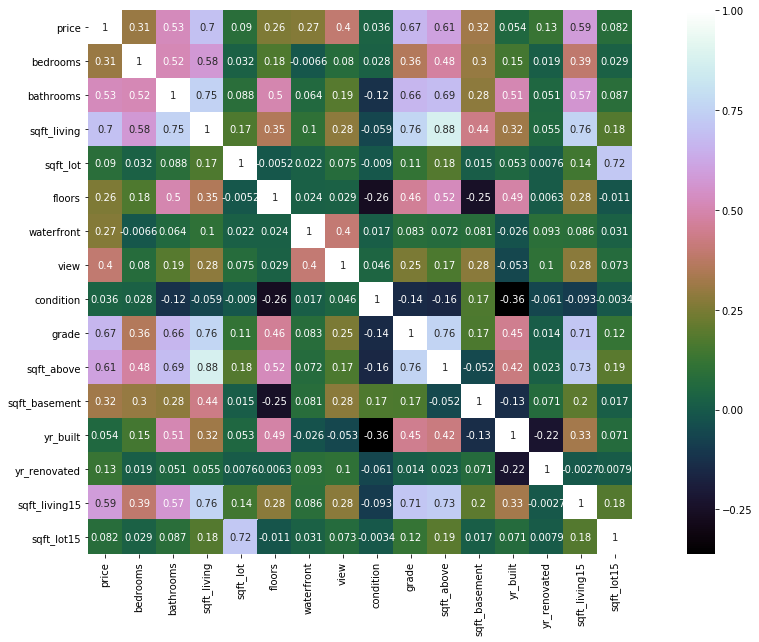

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat=datos_df[variables].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.show()

2. Separa las variables en independientes (X) y dependientes (y). Posteriormente, haz una separación entre prueba y el resto de los datos (validación y entrenamiento) utilizando `train_test_split`. Separa 20% de los datos para prueba.

Nota: Al igual que en el problema 1 puedes seleccionar una submuestra de datos para utilizar durante el resto del problema si tu máquina no tiene mucha capacidad de procesamiento.

In [79]:
from sklearn.model_selection import train_test_split
X_data=datos_df[variables[1:]]
y_labels=datos_df[variables[0]]

X_rest, X_test, y_rest, y_test = train_test_split(X_data,y_labels,test_size=0.2,shuffle=True)

3. Ahora, con las variables seleccionadas haremos un ejercicio de regresión. De manera análoga al inciso 5 del problema 1, utiliza la función `GridSearchCV()` con las funciones y los diccionarios que se presentan en la siguiente celda para crear un modelo final para cada algoritmo. 

    Los algoritmos que utilizaremos son: regresión lineal con OLS, Ridge, LASSO y Elastic Net, regresión con árboles de decisión y bosques aleatorios y regresión con SVMs.
    La métrica que utilizaremos es el error cuadrático medio. Durante el entrenamiento puedes utilizar como scoring parámetro `neg_mean_squared_error` para obtener el negativo de ese valor y, durante la evaluación con los datos de prueba puedes utilizar la función `mean_squared_error` que se incluye a continuación.[[link]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error

dtree_grid={'criterion':['mse','mae'],'max_depth':[2,5,7,10,15,20],
           'min_samples_split':[2,4,7,10,15]}
forest_grid={'n_estimators':[2,5,10,40,75],'criterion':['mse','mae'],
             'max_depth':[2,5,7,10,15,20],'min_samples_split':[2,4,7,10,15]}

svr_grid={"C":[0.01,0.1,1,10,100,1000,10000],'epsilon':[0.01,0.1,1],
          'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

ols_grid = {'normalize':[True,False]}
ridge_grid = {'normalize':[True,False],'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_grid = {'normalize':[True,False],'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
enet_grid = {'normalize':[True,False],'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20],'l1_ratio':[0.1,0.25,0.5,0.75,0.9]}

3.  a) Para cada algoritmo, haz una búsqueda en la malla de hiperparámetros, entrenando con validación cruzada de 5 cortes y selecciona el modelo con el menor error cuadrático medio.

In [81]:
dtree_cv=GridSearchCV(DecisionTreeRegressor(), 
                      dtree_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
dtree_cv.fit(X_rest,y_rest)
print(dtree_cv.best_score_)
print(dtree_cv.best_params_)
print(dtree_cv.best_index_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 266 tasks      | elapsed:  3.1min


-46248990246.611534
{'criterion': 'mse', 'max_depth': 7, 'min_samples_split': 15}
14


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  4.1min finished


In [82]:
forest_cv=GridSearchCV(RandomForestRegressor(), 
                      forest_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
forest_cv.fit(X_rest,y_rest)
print(forest_cv.best_score_)
print(forest_cv.best_params_)
print(forest_cv.best_index_)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 259 tasks      | elapsed:   23.6s
[Parallel(n_jobs=6)]: Done 462 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 745 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 1110 tasks      | elapsed: 96.0min
[Parallel(n_jobs=6)]: Done 1500 out of 1500 | elapsed: 229.2min finished


-34582837940.40892
{'criterion': 'mse', 'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 75}
134


In [83]:
svr_cv=GridSearchCV(SVR(max_iter=50000), 
                      svr_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
svr_cv.fit(X_rest,y_rest)
print(svr_cv.best_score_)
print(svr_cv.best_params_)
print(svr_cv.best_index_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done 420 out of 420 | elapsed: 18.9min finished


-80769414727.41122
{'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}
4


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [84]:
ols_cv=GridSearchCV(LinearRegression(), 
                      ols_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
ols_cv.fit(X_rest,y_rest)
print(ols_cv.best_score_)
print(ols_cv.best_params_)
print(ols_cv.best_index_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
-48256614168.73189
{'normalize': False}
1


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.1s finished


In [85]:
ridge_cv=GridSearchCV(Ridge(), 
                      ridge_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
ridge_cv.fit(X_rest,y_rest)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)
print(ridge_cv.best_index_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-48255978151.92046
{'alpha': 0.001, 'normalize': True}
8


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


In [86]:
lasso_cv=GridSearchCV(Lasso(), 
                      lasso_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
lasso_cv.fit(X_rest,y_rest)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)
print(lasso_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.6s


-48250816280.08183
{'alpha': 5, 'normalize': True}
14


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    9.4s finished


In [87]:
enet_cv=GridSearchCV(ElasticNet(), 
                      enet_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
enet_cv.fit(X_rest,y_rest)
print(enet_cv.best_score_)
print(enet_cv.best_params_)
print(enet_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   29.1s


-48256363307.87817
{'alpha': 0.0001, 'l1_ratio': 0.25, 'normalize': False}
33


[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   37.9s finished
/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


3. b)Calcula el error cuadrático medio sobre el conjunto de prueba, para los modelos seleccionados en el inciso anterior. ¿El error resultó se mayor o menor? ¿A qué se debe esto?

In [88]:
predicted_test=dtree_cv.best_estimator_.predict(X_test)
mse_dtree=mean_squared_error(y_test, predicted_test)
mse_dtree

38789749145.83796

In [89]:
predicted_test=forest_cv.best_estimator_.predict(X_test)
mse_forest=mean_squared_error(y_test, predicted_test)
mse_forest

29713545785.906986

In [90]:
predicted_test=svr_cv.best_estimator_.predict(X_test)
mse_svr=mean_squared_error(y_test, predicted_test)
mse_svr

73747236754.41423

In [91]:
predicted_test=ols_cv.best_estimator_.predict(X_test)
mse_ols=mean_squared_error(y_test, predicted_test)
mse_ols

41601961823.16162

In [92]:
predicted_test=ridge_cv.best_estimator_.predict(X_test)
mse_ridge=mean_squared_error(y_test, predicted_test)
mse_ridge

41602234482.24971

In [93]:
predicted_test=lasso_cv.best_estimator_.predict(X_test)
mse_lasso=mean_squared_error(y_test, predicted_test)
mse_lasso

41642636236.81948

In [94]:
predicted_test=enet_cv.best_estimator_.predict(X_test)
mse_enet=mean_squared_error(y_test, predicted_test)
mse_enet

41623202263.75211

In [95]:
print(mse_dtree)
print(mse_forest)
print(mse_svr)
print(mse_ols)
print(mse_ridge)
print(mse_lasso)
print(mse_enet)

38789749145.83796
29713545785.906986
73747236754.41423
41601961823.16162
41602234482.24971
41642636236.81948
41623202263.75211


# Version Normalizada

In [56]:
from sklearn.model_selection import train_test_split
X_data=datos_df[variables[1:]]
X_data=(X_data-X_data.mean())/X_data.std()
y_labels=datos_df[variables[0]]

X_rest, X_test, y_rest, y_test = train_test_split(X_data,y_labels,test_size=0.2,shuffle=True)

In [66]:
dtree_cv=GridSearchCV(DecisionTreeRegressor(), 
                      dtree_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
dtree_cv.fit(X_rest,y_rest)
print(dtree_cv.best_score_)
print(dtree_cv.best_params_)
print(dtree_cv.best_index_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.6s


-48898630045.51626
{'criterion': 'mse', 'max_depth': 7, 'min_samples_split': 15}
14


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  3.9min finished


In [76]:
forest_cv=GridSearchCV(RandomForestRegressor(), 
                      forest_grid, scoring='neg_mean_squared_error', n_jobs=7, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
forest_cv.fit(X_rest,y_rest)
print(forest_cv.best_score_)
print(forest_cv.best_params_)
print(forest_cv.best_index_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:   28.0s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:   35.1s
[Parallel(n_jobs=7)]: Done 351 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 634 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 999 tasks      | elapsed: 59.5min
[Parallel(n_jobs=7)]: Done 1444 tasks      | elapsed: 202.8min
[Parallel(n_jobs=7)]: Done 1500 out of 1500 | elapsed: 225.6min finished


-36241573589.04747
{'criterion': 'mse', 'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 75}
139


In [61]:
svr_cv=GridSearchCV(SVR(max_iter=50000), 
                      svr_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
svr_cv.fit(X_rest,y_rest)
print(svr_cv.best_score_)
print(svr_cv.best_params_)
print(svr_cv.best_index_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  9.1min
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed: 21.9min
[Parallel(n_jobs=6)]: Done 420 out of 420 | elapsed: 26.2min finished


-51192016649.03522
{'C': 10000, 'epsilon': 0.01, 'kernel': 'linear'}
72


/home/arturo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [62]:
ols_cv=GridSearchCV(LinearRegression(), 
                      ols_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
ols_cv.fit(X_rest,y_rest)
print(ols_cv.best_score_)
print(ols_cv.best_params_)
print(ols_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s


-47642536301.756424
{'normalize': False}
1


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.3s finished


In [63]:
ridge_cv=GridSearchCV(Ridge(), 
                      ridge_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
ridge_cv.fit(X_rest,y_rest)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)
print(ridge_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
-47640856825.7829
{'alpha': 0.01, 'normalize': True}
10


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


In [64]:
lasso_cv=GridSearchCV(Lasso(), 
                      lasso_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
lasso_cv.fit(X_rest,y_rest)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)
print(lasso_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.8s


-47642800696.60208
{'alpha': 5, 'normalize': True}
14


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    9.6s finished


In [65]:
enet_cv=GridSearchCV(ElasticNet(), 
                      enet_grid, scoring='neg_mean_squared_error', n_jobs=6, iid=False, refit=True, cv=5, 
                      verbose=2, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
enet_cv.fit(X_rest,y_rest)
print(enet_cv.best_score_)
print(enet_cv.best_params_)
print(enet_cv.best_index_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   16.8s


-47640126728.30654
{'alpha': 0.01, 'l1_ratio': 0.1, 'normalize': False}
51


[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   24.9s finished


### Best Fit MSE

In [78]:
predicted_test=dtree_cv.best_estimator_.predict(X_test)
std_mse_dtree=mean_squared_error(y_test, predicted_test)
print(std_mse_dtree)

predicted_test=forest_cv.best_estimator_.predict(X_test)
std_mse_forest=mean_squared_error(y_test, predicted_test)
print(std_mse_forest)

predicted_test=svr_cv.best_estimator_.predict(X_test)
std_mse_svr=mean_squared_error(y_test, predicted_test)
print(std_mse_svr)

predicted_test=ols_cv.best_estimator_.predict(X_test)
std_mse_ols=mean_squared_error(y_test, predicted_test)
print(std_mse_ols)

predicted_test=ridge_cv.best_estimator_.predict(X_test)
std_mse_ridge=mean_squared_error(y_test, predicted_test)
print(std_mse_ridge)

predicted_test=lasso_cv.best_estimator_.predict(X_test)
std_mse_lasso=mean_squared_error(y_test, predicted_test)
print(std_mse_lasso)

predicted_test=enet_cv.best_estimator_.predict(X_test)
std_mse_enet=mean_squared_error(y_test, predicted_test)
print(std_mse_enet)

48942999805.82949
36342643600.833565
48342824391.90656
45478384458.57061
45441151565.863304
45453065140.32379
45443345830.43461


In [96]:
print(mse_dtree)
print(mse_forest)
print(mse_svr)
print(mse_ols)
print(mse_ridge)
print(mse_lasso)
print(mse_enet)

38789749145.83796
29713545785.906986
73747236754.41423
41601961823.16162
41602234482.24971
41642636236.81948
41623202263.75211


In [97]:
print(mse_dtree-std_mse_dtree)
print(mse_forest-std_mse_forest)
print(mse_svr-std_mse_svr)
print(mse_ols-std_mse_ols)
print(mse_ridge-std_mse_ridge)
print(mse_lasso-std_mse_lasso)
print(mse_enet-std_mse_enet)

-10153250659.991531
-6629097814.9265785
25404412362.507668
-3876422635.408989
-3838917083.613594
-3810428903.5043106
-3820143566.682495
